# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image  
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Dataset

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory data analysis

In [3]:
df=df.drop(['Id'],axis=1)

In [4]:
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In the dataset above each observation is catagorized in 3 groups i.e., Iris-setosa, Iris-versicolor and Iris-virginica. As in this we have to use supervised learning, here we will used clustering. There are different types of clustering like agglomerative clustering, k-means clustering, db-scan, first we will check what will be the suitable clustering we can use in this.

In [8]:
df_new=df.set_index('Species')
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)

In [9]:
df_new.head()

0
Species                       
Iris-setosa SepalLengthCm  5.1
            SepalWidthCm   3.5
            PetalLengthCm  1.4
            PetalWidthCm   0.2
            SepalLengthCm  4.9

In [10]:
df_new.reset_index(inplace=True)
df_new.rename(columns={'level_1':'measurement',0:'size'},inplace=True)

In [11]:
df_new.head()

,Species,measurement,size
0,Iris-setosa,SepalLengthCm,5.1
1,Iris-setosa,SepalWidthCm,3.5
2,Iris-setosa,PetalLengthCm,1.4
3,Iris-setosa,PetalWidthCm,0.2
4,Iris-setosa,SepalLengthCm,4.9


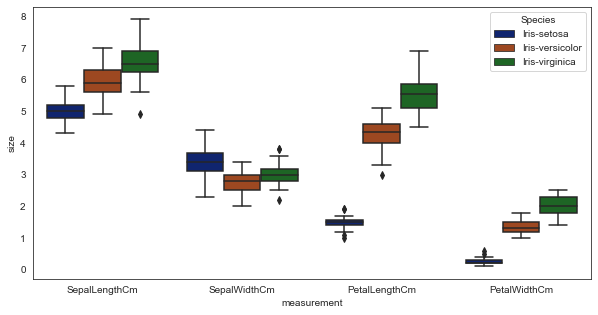

In [12]:
sns.set_style('white')
sns.set_palette('dark')
f=plt.figure(figsize=(10,5))
sns.boxplot(x=df_new['measurement'],y=df_new['size'],hue=df_new['Species'])

Pairplot shows the overall data distribution

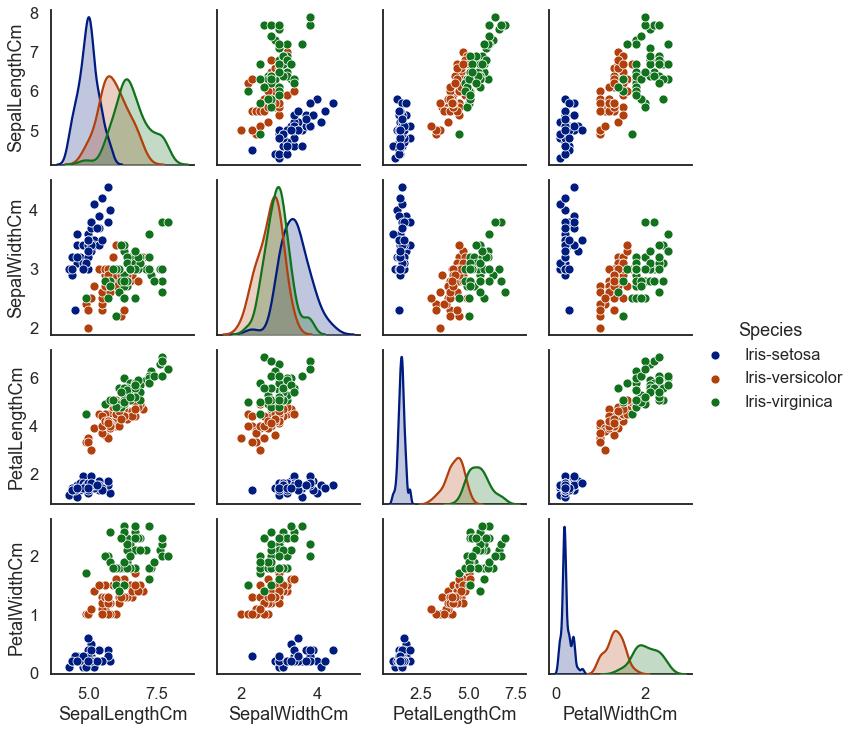

In [13]:
sns.set_context('talk')
plot=sns.pairplot(df,hue='Species')
plot

From pairplot we can infer that the separate group of iris-setosa is present whereas the clusters of iris-virginica and iris-versicolor are overlapping

In [14]:
#As unsupervised learning did not required labelled columns hence removing the same for performing operations
x=df.drop(['Species'],axis=1)
y=df['Species']

# K-means clustering

In [15]:
x=x.values

In [16]:
k=range(1,8)
inertia=[]
for i in k:
    mod_clst=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=48)
    mod_clst_fit=mod_clst.fit(x)
    inertia.append(mod_clst_fit.inertia_)

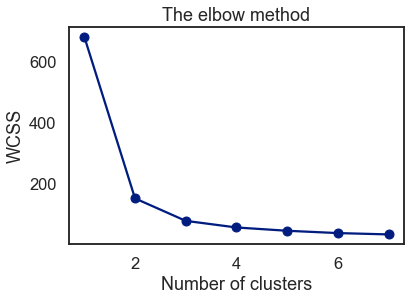

In [17]:
plt.plot(k, inertia,marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

***The above graph is an elbow curve from which we can take the optimal number of clusters going to be required to us. From above we can se that the sharp curve is forming at the point of 2 as well as 3. So out of the two clusters we can take any of it but this is graphical analysis and hence confirming the same using quantitative method that is by silhoutte score***

In [18]:
k=[2,3,4,5,8]
for i in k:
    mod=KMeans(i,random_state=48)
    modfit=mod.fit(x)
    L=modfit.predict(x)
    scores=silhouette_score(x,L)
    print("The silhouette score for {} cluster is {}".format(i,scores))

The silhouette score for 2 cluster is 0.6808136202936816
The silhouette score for 3 cluster is 0.5525919445499757
The silhouette score for 4 cluster is 0.4978256901095472
The silhouette score for 5 cluster is 0.4897430308769173
The silhouette score for 8 cluster is 0.3409294311229316


***Silhoutee Score is the distance between the clusters. More the distance between the clusters, more significantly they can be identified. Here we see that the highest number of silhoutte score for cluster 2. However we can select 3 also as it is also having high silhoutte score***

### Selecting no. of clusters as 3

In [19]:
mod_clst = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
clst = mod_clst.fit_predict(x)

In [20]:
clst_df=pd.DataFrame(clst)

In [21]:
clst_df=clst_df.rename(columns={0:'clusters'})

In [22]:
clst_df['clusters'].unique()

array([1, 2, 0])

***Thus we got the new data frame having the 3 clusters i.e., 0, 1 and 2.***

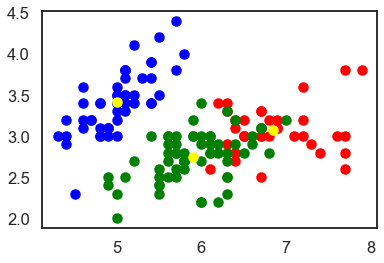

In [23]:
#Visualising clsuters and centroids on first two columns
plt.scatter(x[clst==0,0],x[clst==0,1],c='red')
plt.scatter(x[clst==1,0],x[clst==1,1],c='blue')
plt.scatter(x[clst==2,0],x[clst==2,1],c='green')
plt.scatter(mod_clst.cluster_centers_[:,0],mod_clst.cluster_centers_[:,1],c='yellow')

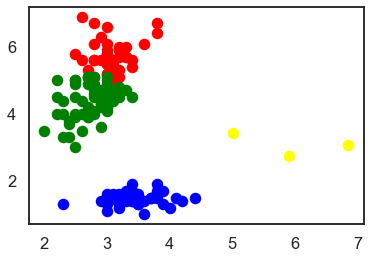

In [24]:
#Visualising clsuters and centroids on next two columns
plt.scatter(x[clst==0,1],x[clst==0,2],s=100,c='red')
plt.scatter(x[clst==1,1],x[clst==1,2],s=100,c='blue')
plt.scatter(x[clst==2,1],x[clst==2,2],s=100,c='green')
plt.scatter(mod_clst.cluster_centers_[:,0],mod_clst.cluster_centers_[:,1],s=100,c='yellow')

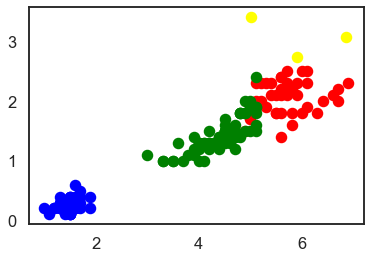

In [25]:
#Visualising clsuters and centroids on last two columns
plt.scatter(x[clst==0,2],x[clst==0,3],s=100,c='red')
plt.scatter(x[clst==1,2],x[clst==1,3],s=100,c='blue')
plt.scatter(x[clst==2,2],x[clst==2,3],s=100,c='green')
plt.scatter(mod_clst.cluster_centers_[:,0],mod_clst.cluster_centers_[:,1],s=100,c='yellow')

***Thus from above graph we can see the different clusters. If we have choosen 2, it will gives us two clusters which would have a suffuicient distance between them as given by silhoutte score. However cluster only creates a group based on the similarities (in k-means it is distances from centroid) but did not tell which group refers to which class and hence for that we would have to develop a classification algorithm on the original dataset and on that we have to apply our cluster model to get the labelled of the dat***

### Classification algortihm

Now seeing the probability distribution of each feature:

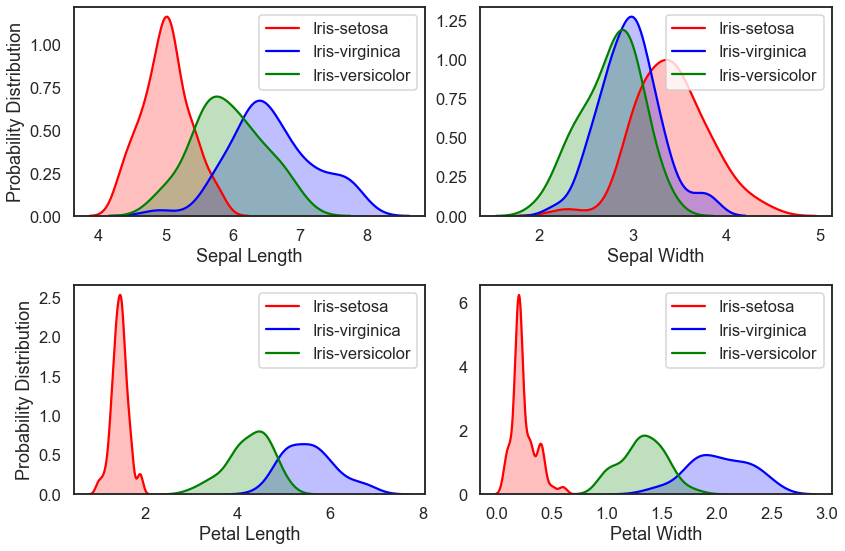

In [26]:
fig, ax =plt.subplots(2,2,figsize=(12,8))
ax[0,0].set_xlabel('Sepal Length')
ax[0,1].set_xlabel('Sepal Width')
ax[1,0].set_xlabel('Petal Length')
ax[1,1].set_xlabel('Petal Width')
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'SepalLengthCm'], ax=ax[0,0], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'SepalLengthCm'],ax=ax[0,0], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'SepalLengthCm'],ax=ax[0,0], color='g', shade=True, Label='Iris-versicolor') 
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'SepalWidthCm'], ax=ax[0,1], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'SepalWidthCm'],ax=ax[0,1], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'SepalWidthCm'],ax=ax[0,1], color='g', shade=True, Label='Iris-versicolor')
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'PetalLengthCm'], ax=ax[1,0], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'PetalLengthCm'],ax=ax[1,0], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'PetalLengthCm'],ax=ax[1,0], color='g', shade=True, Label='Iris-versicolor')
sns.kdeplot(df.loc[(df['Species']=='Iris-setosa'), 
            'PetalWidthCm'], ax=ax[1,1], color='r', shade=True, Label='Iris-setosa') 
  
sns.kdeplot(df.loc[(df['Species']=='Iris-virginica'),  
            'PetalWidthCm'],ax=ax[1,1], color='b', shade=True, Label='Iris-virginica')

sns.kdeplot(df.loc[(df['Species']=='Iris-versicolor'),  
            'PetalWidthCm'],ax=ax[1,1], color='g', shade=True, Label='Iris-versicolor')

for ax in ax.flatten():
    if ax.is_first_col():
        ax.set_ylabel('Probability Distribution')
fig.tight_layout()

From the above graphs we cannot clearly infer that the features are normally distributedd or not, hece using the shapiro test for the same:

***Shapiro-Wilk Test for Normal Distribution***

***Null Hypothesis -*** The sample is not significantly deviated from normal distribution

***Alternate Hypothesis -*** The sample is significantly deviated from normal distribution

***If p<0.05, reject the null hypothesis and accept the alternate***

In [27]:
st,p=stats.shapiro(df['SepalLengthCm'])
if p<0.05:
    print('The variable SepalLengthCm is not normally distributed')
else:
    print('The variable SepalLengthCm is normally distributed')
    
st,p=stats.shapiro(df['SepalWidthCm'])
if p<0.05:
    print('The variable SepalWidthCm is not normally distributed')
else:
    print('The variable SepalWidthCm is normally distributed')
    
st,p=stats.shapiro(df['PetalLengthCm'])
if p<0.05:
    print('The variable PetalLengthCm is not normally distributed')
else:
    print('The variable PetalLengthCm is normally distributed')

st,p=stats.shapiro(df['PetalWidthCm'])
if p<0.05:
    print('The variable PetalWidthCm is not normally distributed')
else:
    print('The variable PetalWidthCm is normally distributed')

The variable SepalLengthCm is not normally distributed
The variable SepalWidthCm is normally distributed
The variable PetalLengthCm is not normally distributed
The variable PetalWidthCm is not normally distributed


***Thus from above analysis we can see that except Sepal width all the other features are not normally distributed i.e., they have the skewed data***

***Moreover from the box-plot we also have observed the presence of outliers***

***From the pair plot we also observed that for some of the features, the labels are linearly separable whereas for some it is not.***

Thus from the above points we can choose decision tree classification algorithm instead of logistic as it is one of the classification algorithm that can handle skewed data, data with outliers as well as linearly non separable data

## Defining Decision tree algorithm

In [28]:
inp=df.drop(['Species'],axis=1)
op=df['Species']

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(inp,op,test_size=0.3,random_state = 48)

In [30]:
dtree_mod=DecisionTreeClassifier()
dtree_mod.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
ypredict=dtree_mod.predict(xtest)

In [32]:
accuracy=accuracy_score(ytest,ypredict)
confusion_matrice=confusion_matrix(ytest,ypredict)

In [33]:
print('Accuracy:',accuracy)

Accuracy: 0.9333333333333333


In [34]:
confusion_matrice

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]], dtype=int64)

In [35]:
ytest.value_counts()

Iris-versicolor    18
Iris-virginica     16
Iris-setosa        11
Name: Species, dtype: int64

Thus here we get our model with ***accuracy 93.33%***. From the confusion matrix and ytest value counts we can say that  our first row in confusion matrix is of Iris-setosa, the next row is of Iris-versicolor and the last row is of Iris-verginica. Confusion matrix gives the information about how many of the labels are correctly identified and how many are wrongly identified. ***Iris setosa is being hundred percent correctly identified by our model. Out of 18 Iris-versicolor, 16 are correctly identified and 2 are miss identified to Iris-verginica. Similarlly, out of 16 Iris-verginica, 1 is wrongly identified as Iris-versicolor where as others are truely identified.***

In [36]:
report=classification_report(ytest,ypredict)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45



From the classification report for Iris-setosa, we get precision of 100% (precision means out of the total prediction, how many are correctly predicted), recall 100%(recall means out of the actual prediction, how many are correctly identified) and f1 score which is a balance between precision and recall also as 100%.
For iris-versicolor, the precision is 94% (16/17 from confusion matrix) and recall is 89% (16/18 from confusion matrix) and the F1 score is of 91%, Similarlly for iris-verginica, the precision is 88% and recall is 94%

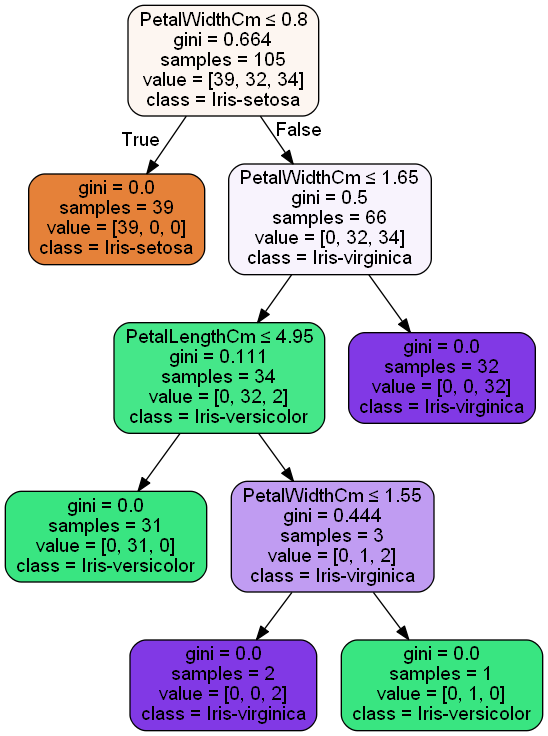

In [65]:
dot_data = StringIO()
export_graphviz(dtree_mod, out_file=dot_data, feature_names=inp.columns.tolist(),class_names=op.unique().tolist(),
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

The above graph is a viusal representation of the decision tree. If a new data point reaches to a particular leaf in the decision tree, will have a class of that leaf.

Decision tree tends to overfit the model a lot but in our example for testing the accuracy against test data we directly get 93% which means that there is very less possibility of overfitting in our model. Hence no need of hpyerparameter tuning

Now applying the results from the cluster analysis to our classification model so that our different clusters should be classified accordingly.

In [38]:
upd_df=pd.concat([inp,clst_df],1)

In [39]:
upd_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


***Creating the 3 different groups for each class***

In [40]:
upd_df_class1=upd_df[(upd_df['clusters']==1)]

In [41]:
upd_df_class0=upd_df[(upd_df['clusters']==0)]

In [42]:
upd_df_class2=upd_df[(upd_df['clusters']==2)]

In [43]:
upd_df_class1.drop(['clusters'],1,inplace=True)
upd_df_class0.drop(['clusters'],1,inplace=True)
upd_df_class2.drop(['clusters'],1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


***Applying the groups to the decision tree model in order to predict the class***

In [44]:
dtree_mod.predict(upd_df_class1)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [45]:
dtree_mod.predict(upd_df_class0)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [46]:
dtree_mod.predict(upd_df_class2)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolo

In [47]:
classes=dtree_mod.predict(upd_df_class1)

In [48]:
classes=pd.DataFrame(classes)

In [49]:
upd_df_class1.reset_index(drop=True,inplace=True)

In [50]:
newdf_class1=pd.concat([upd_df_class1,classes],1)

In [51]:
newdf_class1.rename(columns={0:'species'}, inplace=True)

In [52]:
newdf_class1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
classes0=dtree_mod.predict(upd_df_class0)

In [54]:
classes0=pd.DataFrame(classes0)

In [55]:
upd_df_class0.reset_index(drop=True, inplace=True)

In [56]:
newdf_class0=pd.concat([upd_df_class0,classes0],1)

In [57]:
newdf_class0.rename(columns={0:'species'}, inplace=True)

In [58]:
newdf_class0.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,6.9,3.1,4.9,1.5,Iris-versicolor
1,6.7,3.0,5.0,1.7,Iris-virginica
2,6.3,3.3,6.0,2.5,Iris-virginica
3,7.1,3.0,5.9,2.1,Iris-virginica
4,6.3,2.9,5.6,1.8,Iris-virginica


In [59]:
classes2=dtree_mod.predict(upd_df_class2)

In [60]:
classes2=pd.DataFrame(classes2)

In [61]:
upd_df_class2.reset_index(drop=True, inplace=True)

In [62]:
newdf_class2=pd.concat([upd_df_class2,classes2],1)

In [63]:
newdf_class2.rename(columns={0:'species'}, inplace=True)

In [64]:
newdf_class2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,5.5,2.3,4.0,1.3,Iris-versicolor
3,6.5,2.8,4.6,1.5,Iris-versicolor
4,5.7,2.8,4.5,1.3,Iris-versicolor


### Thus, the different dataframes for different clusters with classification of each cluster is formed